In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("weather_forecast_data.csv")
df
df["Rain"] = df["Rain"].apply(lambda x : 1 if x== "rain" else 0)
df.to_csv(r"C:\Users\abdul\Desktop\my project\weather_data_rain.csv", index=False)


In [20]:
dataset = np.genfromtxt("weather_data_rain.csv", delimiter = ",")
X,y = dataset[1:,:-1], dataset[1:,-1]


In [21]:
humidity,cloud_cover = X[:,1] , X[:,3]
temp = X[:,0]


In [22]:
mask_rain = y==1
mask_no_rain= y==0


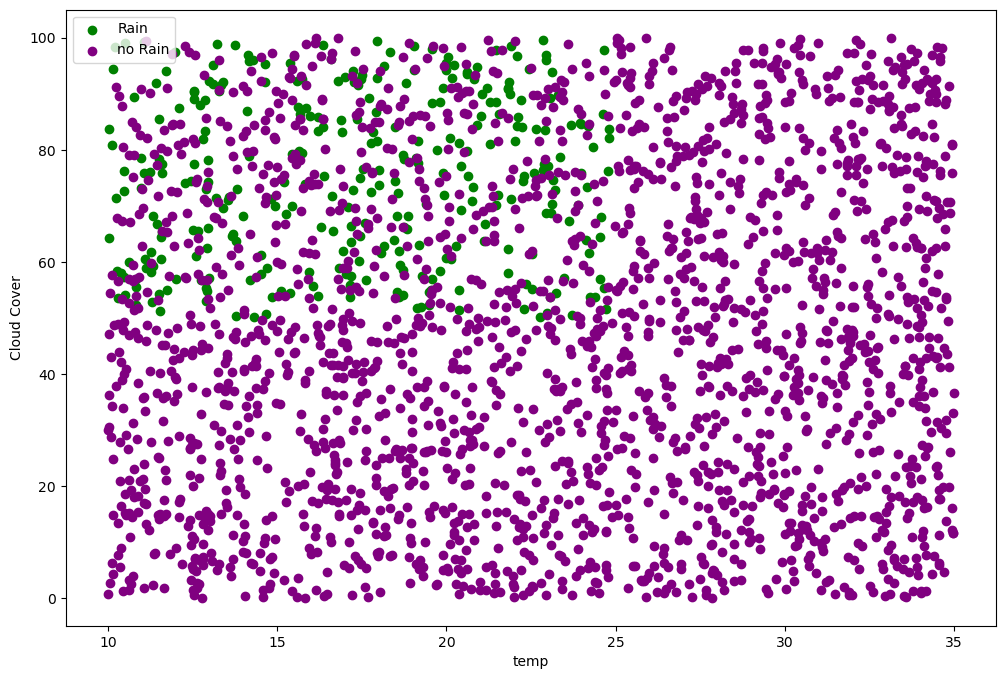

In [23]:
fig ,axes =plt.subplots(1,1,figsize=(12,8))
axes.scatter(temp[mask_rain], cloud_cover[mask_rain],color='green', label='Rain')
axes.scatter(temp[mask_no_rain], cloud_cover[mask_no_rain], color='purple', label='no Rain')
axes.set_xlabel("temp")
axes.set_ylabel("Cloud Cover")
axes.legend()





we can deduce from the escatter plot that the "cloud cover " feature is really important and will play a mjor role in decision making of the model. it also shows us that it 
mostly rains when the temperature is less than or equal to 25 and the cloud cover percentage is more than 50. The eplot also shows us that there are no outliers in our dataset  

In [24]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
tree = DecisionTreeClassifier()
tree.fit(X[:1500:,:4],y[:1500]) # used 1500 training samples
print("model accuracy:",tree.score(X[1500:,:4],y[1500:])) # used 1000 testing samples

model accuracy: 0.999


A decision tree model fits well and perform well on the test set

[Text(0.3333333333333333, 0.875, 'humidity <= 70.214\ngini = 0.23\nsamples = 1500\nvalue = [1301, 199]\nclass = rain'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 884\nvalue = [884, 0]\nclass = rain'),
 Text(0.5, 0.625, 'cloud cover <= 50.003\ngini = 0.437\nsamples = 616\nvalue = [417, 199]\nclass = rain'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 305\nvalue = [305, 0]\nclass = rain'),
 Text(0.6666666666666666, 0.375, 'Temperature <= 24.914\ngini = 0.461\nsamples = 311\nvalue = [112, 199]\nclass = no rain'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 199\nvalue = [0, 199]\nclass = no rain'),
 Text(0.8333333333333334, 0.125, 'gini = 0.0\nsamples = 112\nvalue = [112, 0]\nclass = rain')]

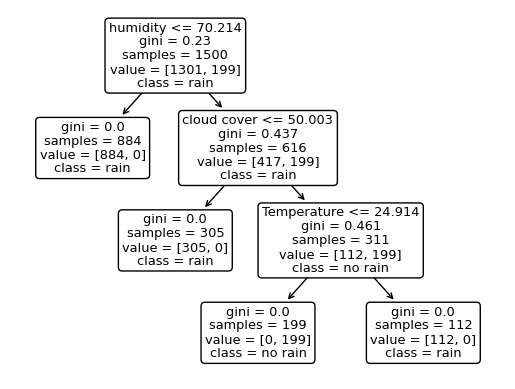

In [25]:
plot_tree(tree,feature_names=["Temperature","humidity","wind speed","cloud cover"] ,class_names = ["rain","no rain"],rounded = True)

In [17]:
def h1(k):
    return k % 12
def h2(k):
    return 1+k %(11)


def h3(k):
    def h1(k):
        return k % 12

 
    return h1(h1(k) + h2(k))
h1(19)

7